## Grupo 4

*   Alex Riquelme
*   Camila Aguilar
*   Camila Varas
*   Claudia Araya
*   Fabián Cuevas

#Parte II

Suponga que tenemos una empresa, cuya área de marketing, desea generar
una clusterización para poder tener mayor éxito con sus campañas. Para esto
nos entregó una base de datos (llamada evaluación_mkt_campaign.csv) que
contiene los siguientes campos:
1. ID: Identificador único de cliente
2. Age: Edad del cliente
3. Seniority: Días desde el enrolamiento del cliente
4. Children: Número hijos
5. Ingreso: Ingreso anual del cliente
6. Recency: Días desde la última compra del cliente
7. MntWines: Gasto en vino en los últimos 2 años
8. MntFruits: Gasto en fruta en los últimos 2 años
9. MntMeatProducts: Gasto en carne en los últimos 2 años
10. MntFishProducts: Gasto en pescado en los últimos 2 años
11. MntSweetProducts: Gasto en dulces en los últimos 2 años
12. MntGoldProds: Gasto en oro en los últimos 2 años
13. NumDealsPurchases: Número de compras realizada bajo descuento
14. NumWebPurchases: Número de compras realizadas por la web
15. NumCatalogPurchases: Número de compras realizadas por catálogo
16. NumStorePurchases: Número de compras realizadas en la tienda
17. NumWebVisitsMonth: Número de visitas a la página web

En base a estos datos, realice lo siguiente:

**Búsqueda de Anomalías:** Usando las columnas de comportamiento de compra, encuentre registros anómalos correspondientes al 5% de la muestra,
y descártelos.

**Feature Extraction:** Usando los datos filtrados reduzca el número de variables. Busque una representación que le permita explicar un 90% de la varianza original de los datos.

**Clustering:**

a) Usando los resultados anteriores clusterice el comportamiento de sus
clientes. El área de marketing solicitó que el número de clusters sea no
mayor a 8. Encuentre el número óptimo de clusters considerando esa
restricción

b) Reporte los centroides de cada cluster en términos de las variables
originales. Interprete.

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Paso 1: Realizamos una Búsqueda de Anomalías
data = pd.read_csv("/content/sample_data/evaluacion_mkt_campaign.csv")

behavior_columns = ['Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'NumWebVisitsMonth']

anomaly_detector = IsolationForest(contamination=0.05)

data['anomaly'] = anomaly_detector.fit_predict(data[behavior_columns])

filtered_data = data[data['anomaly'] == 1].copy()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [3]:
# Paso 2: Realizamos Feature Extraction

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[behavior_columns])
pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(scaled_data)

In [4]:
# Paso 3: Realizamos Clustering

max_clusters = 8
inertia = []
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

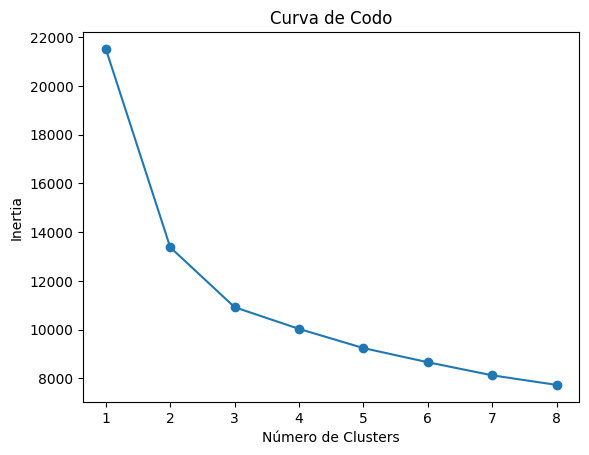

In [5]:
# Ploteamos la curva de codo

plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Curva de Codo')
plt.show()

In [6]:
# Elegimos el número óptimo de clusters

optimal_clusters = 3

In [7]:
# Efectuamos la Clusterización con el número óptimo de clusters

kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(pca_data)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# Calculamos los centroides de cada cluster en términos de las variables originales

centroides = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_))

In [11]:
# Mostramos los centroides

centroides_df = pd.DataFrame(centroides, columns=behavior_columns)

print("Centroides de cada cluster en términos de las variables originales:")

print(centroides_df)

Centroides de cada cluster en términos de las variables originales:
     Recency    MntWines  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  48.277332  435.007861       122.231949        22.485166         16.418997   
1  50.151211  585.645490       408.440999        92.103129         67.612021   
2  49.104912   38.369073        22.387062         7.219777          5.170351   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0     55.338335           3.962377         6.214737             2.727079   
1     68.434435           1.384461         5.292488             5.671380   
2     14.222002           1.863125         2.050076             0.527710   

   NumStorePurchases  NumWebVisitsMonth  
0           7.404412           6.312197  
1           8.488313           2.865179  
2           3.216165           6.246235  
